<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This assignments has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [2]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

## Question 1
How many examples are there in the training dataset?



In [3]:
## Enter your solution here
Training_data.shape[0]

404

## Question 2
How many examples are there in the test dataset?



In [4]:
## Enter your solution here
Test_data.shape[0]

102

## Question 3

How many features are there in the dataset?



In [5]:
## Enter your solution here
Training_data.shape[1]

13

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

Note: As per your convenience, you can convert the shape of the training dataset to $(d, n)$.

In [6]:
## Enter your solution here
Training_data_with_dummy = np.vstack([np.ones(Training_data.shape[0]), Training_data.T]).T
Test_data_with_dummy = np.vstack([np.ones(Test_data.shape[0]), Test_data.T]).T

print("Shape of training data with dummy feature:", Training_data_with_dummy.shape)
print("Shape of test data with dummy feature:", Test_data_with_dummy.shape)

Shape of training data with dummy feature: (404, 14)
Shape of test data with dummy feature: (102, 14)


## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0+w_1+...w_d$.

---

In linear regression, the objective is to minimize the squared loss function, which is:

$$
L(w) = \sum_{i=1}^n (y_i - \mathbb{x}_i^T w)^2
$$

where:
- $y_i$ is the actual label for the $i$-th data point,
- $\mathbb{x}_i^T$ is the feature vector for the $i$-th data point,
- $w$ is the weight vector (which includes the intercept term $w_0$).

### Step 1: First derivative of the loss function

To find the minimum, we take the derivative of the loss function with respect to the weights $w$ and set it to zero. The derivative of the squared loss with respect to $w$ is:

$$
\frac{\partial L(w)}{\partial w} = -2 \sum_{i=1}^n \mathbb{x}_i (y_i - \mathbb{x}_i^T w)
$$

### Step 2: Set the derivative to zero

We set the gradient to zero to find the minimum:

$$
-2 \sum_{i=1}^n \mathbb{x}_i (y_i - \mathbb{x}_i^T w) = 0
$$

Simplifying this equation:

$$
\sum_{i=1}^n \mathbb{x}_i y_i = \sum_{i=1}^n \mathbb{x}_i \mathbb{x}_i^T w
$$

### Step 3: Solving for $w$

We can now solve for the weight vector $w$:

$$
X^T y = X^T X w
$$

where $X$ is the matrix of features (with the dummy feature added) and $y$ is the vector of labels.

This leads to the **normal equation** for linear regression:

$$
w = (X^T X)^{-1} X^T y
$$

### Step 4: Sum of the weights

To find the value of $w_0 + w_1 + \dots + w_d$, we need to compute the sum of the components of the weight vector $w$. This is done by summing the elements of $w$:

$$
w_0 + w_1 + \dots + w_d = \mathbf{1}^T w
$$

where $\mathbf{1}$ is a vector of ones with the same dimension as $w$.




In [7]:
## Enter your solution here
X = Training_data_with_dummy
y = labels

w = np.linalg.inv(X.T @ X) @ X.T @ y
sum_of_weights = np.sum(w)            # Calculate w_0 + w_1 + ... + w_d

print(f"The sum of the weights w_0 + w_1 + ... + w_d is: {sum_of_weights:.3f}")

The sum of the weights w_0 + w_1 + ... + w_d is: 20.525


## Question 5
Find the average of the predictions made by the above model.

---

We first need to compute the predictions for all the training examples using the model $h_w(x) = X^T w$. Then, we can calculate the average of these predictions.



In [8]:
## Enter your solution here
predictions = X @ w
np.mean(predictions)

22.309158415841498

## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [9]:
## Enter your solution here
loss = np.sqrt(np.mean((y - predictions)**2))
print(f"The loss (RMSE) for the training data is: {loss:.3f}")

The loss (RMSE) for the training data is: 4.552


## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [10]:
## Enter your solution here
test_predictions = Test_data_with_dummy @ w
test_loss = np.sqrt(np.mean((test_labels - test_predictions)**2))
print(f"The loss (RMSE) for the test data is: {test_loss:.3f}")

The loss (RMSE) for the test data is: 5.328


## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations. Enter the sum of all the weights.

---
### Steps:

1. **Define the cost function**: For linear regression, the cost function (mean squared error) is:

   $$
   J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where $\hat{y}_i = x_i^T w$, and $x_i$ is the feature vector for the $i^{th}$ training data point.

2. **Gradient of the cost function**: The gradient of the cost function with respect to $w$ is:

   $$
   \nabla J(w) = \frac{2}{n} X^T (Xw - y)
   $$

   Where $X$ is the feature matrix (with the dummy feature), $y$ is the true label vector, and $w$ is the weight vector.

3. **Gradient descent update**: The weights are updated using the gradient descent rule:

   $$
   w^{(t+1)} = w^{(t)} - \eta \cdot \nabla J(w)
   $$

   Where $\eta$ is the learning rate.




In [15]:
## Enter your solution here
learning_rate = 10e-10
iterations = 100

w = np.zeros(Training_data_with_dummy.shape[1])

# Perform gradient descent for 100 iterations
for i in range(iterations):
    predictions = Training_data_with_dummy @ w
    gradient = -(2 / Training_data_with_dummy.shape[0]) * Training_data_with_dummy.T @ (labels - predictions)
    w = w - learning_rate * gradient              # Update weights

# Compute the sum of all the weights
sum_of_weights = np.sum(w)

print(f"The sum of all the weights after 100 iterations is: {sum_of_weights:.3f}")

The sum of all the weights after 100 iterations is: 0.004


## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [16]:
## Enter your solution here
predictions = Training_data_with_dummy @ w
np.sqrt(np.mean((predictions - labels)**2 ))

23.045770142366678

## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [17]:
## Enter your solution here
test_predictions = Test_data_with_dummy @ w
np.sqrt(np.mean((test_predictions - test_labels)**2 ))

23.85950668842472

## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. . Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight. Do not take the avearge of weights updated in all the iterations. Enter the sum of all the weights.

---
The weight update is performed using the gradient of the squared error loss function. The gradient for each parameter $w_j$ is calculated as:
$$
\nabla_{w_j}\text{Loss} = -\frac{2}{\text{batch size}} \sum_{i=1}^{\text{batch size}}(y_i - \hat{y_i})x_{ij}
$$



In [18]:
## Enter your solution here
eta = 10**-8  # Learning rate
n = Training_data_with_dummy.shape[0]  # Number of samples
d = Training_data_with_dummy.shape[1]  # Number of features (including dummy feature)
batch_size = int(np.ceil(n / 5))  # Batch size
w = np.zeros(d)  # Initialize the weight vector as zero (shape: (d,))

# Stochastic Gradient Descent (SGD)
for i in range(1000):  # 1000 iterations
    np.random.seed(i)  # Set the seed for reproducibility
    indices = np.random.choice(n, size=batch_size, replace=False)  # Randomly sample a batch
    X_batch = Training_data_with_dummy[indices]  # Batch of data points
    y_batch = labels[indices]  # Corresponding labels

    # Compute the predictions for the batch
    predictions = np.dot(X_batch, w)

    # Compute the gradient of the loss function (squared error)
    gradient = -2 * np.dot(X_batch.T, (y_batch - predictions)) / batch_size

    # Update weights
    w -= eta * gradient

# After 1000 iterations, compute the sum of the weights
weight_sum = np.sum(w)

print(f"Sum of the weights after 1000 iterations: {weight_sum:.4f}")

Sum of the weights after 1000 iterations: 0.0652


## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [19]:
## Enter your solution here
predictions = Training_data_with_dummy @ w
np.sqrt(np.mean((predictions - labels)**2 ))

10.215826867450467

## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.


In [20]:
## Enter your solution here
test_predictions = Test_data_with_dummy @ w
np.sqrt(np.mean((test_predictions - test_labels)**2 ))

9.9055652209872

# Section 2:

**Kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$.

`y` = label vector corresponding to the training dataset

In [21]:
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1)

## Question 14

Plot the scatter plot between feature and the labels.



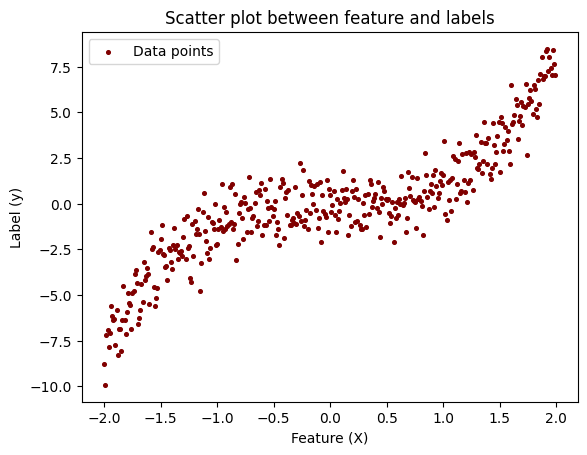

In [24]:
## Enter your solution here
plt.scatter(X, y, color='maroon', label='Data points', s=7)
plt.xlabel('Feature (X)')
plt.ylabel('Label (y)')
plt.title('Scatter plot between feature and labels')
plt.legend()
plt.show()

## Question 15
How many examples are there in the training dataset?



In [26]:
## Enter your solution here
X.shape[0]

400

## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [27]:
## Enter your solution here
dummy_feature = np.ones((X.shape[0], 1))  # Create a column of ones
X_with_dummy = np.hstack((dummy_feature, X))  # Add the dummy feature to X
X_with_dummy = X_with_dummy.T  # Reshape the matrix to (d, n)

print("X_with_dummy shape:", X_with_dummy.shape)

X_with_dummy shape: (2, 400)


## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

let us call the vector $\alpha$ as coefficient vector. Find the sum of elements in the coefficient vector.

---
Formula for solving for the coefficient vector $\alpha$:
 $$
 \alpha = (K + \lambda I)^{-1} y
 $$



In [28]:
## Enter your solution here
lambda_reg = 1e-8           # Regularization parameter (small value)
def polynomial_kernel(x_i, x_j, degree=3):
    return (np.dot(x_i, x_j) + 1)**degree

n = X.shape[0]  # Number of samples
K = np.zeros((n, n))  # Initialize kernel matrix

# Compute the kernel matrix using the polynomial kernel
for i in range(n):
    for j in range(n):
        K[i, j] = polynomial_kernel(X[i], X[j])

# Compute the coefficient vector alpha using kernel regression
alpha = np.linalg.inv(K + lambda_reg * np.eye(n)).dot(y)

sum_alpha = np.sum(alpha)         # Calculate the sum
print("Sum of elements in the coefficient vector:", sum_alpha)

Sum of elements in the coefficient vector: -0.1424960494041443


## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.

---
Predictions for each data point by the kernel regressor will be given by:
$$
\hat{y}(x_i) = \sum_{j=1}^{n}K(x_i, x_j) \alpha_j
$$



In [29]:
## Enter your solution here
# Computing the predictions for all training data points
predictions = np.zeros(n)
for i in range(n):
    predictions[i] = np.sum(K[i, :] * alpha[:, 0])

# Compute the sum of the predictions
sum_predictions = np.sum(predictions)

print("Sum of predictions made by the kernel regression model:", sum_predictions)

Sum of predictions made by the kernel regression model: -25.690514013171196


## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [30]:
## Enter your solution here
np.sqrt(np.mean(predictions - y)**2)

9.022732699440894e-06

### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

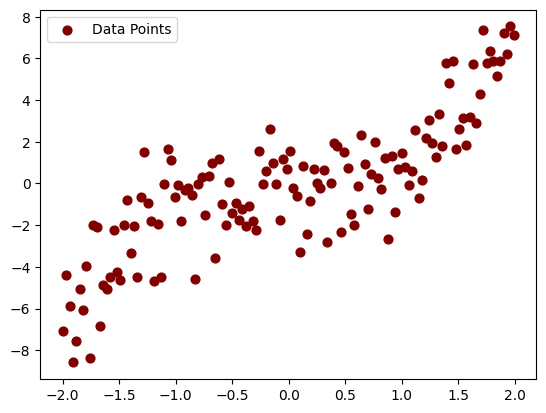

In [34]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew, ynew, color='maroon', s=40, label='Data Points')
plt.legend()
plt.show()

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [36]:
## Enter your solution here
test_predictions = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    test_predictions[i] = np.sum(K[i, :] * alpha[:, 0])

# Loss on test points
np.sqrt(np.mean((y_test - test_predictions)**2))

8.417160394150372